In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<p>Scikit-learn es la libreria mas usuada de Machine Learning</p>
<ul>
   <li>Preprocesamiento de datos en sklearn.preprocessing</li>
    <li>Algoritmos de Machine Learning en <strong>sklearn.linear_model. sklearn.svm, sklearn.ensemble,</strong> y  muchos mas.</li>
   <li>Evaluacion de modelos en <strong>sklearn.model_selection y sklearn_metrics.</strong></li>
</ul>

<hr>
<p>Scikit-learn posee muchos modelos, se pueden implementar tanto, regresiones lineales como regresiones regularizadas, árboles de decisión, SDMs, etc. y sigue de muy cerca los resultados de la investigacion e implementa lso resultados mas maduros
y probados en sus modulos. <a href="https://scikit-learn.org/stable/documentation.html">La documentacion</a> extensa muestra como la libreria es un compendio de conocimiento
en Machine Learning llevado a sofrware</p>

In [6]:
# Los 3 metodos mas importantes del estimador son:
# * FIt: Entrena el  modelo.
# * Predict: Predice valores, con datos nuevos.
# * Score: Mide el performance del algoritmo y nos indica una probabilidad de que tan fiable es nuestra prediccion

In [7]:
# sklearn tiene una funcion qu se llama train_test_split que funciona para separar los datos de un dataset por 
# ejemplo y pasar unos datos a una variable y otros a otra

# ¿Qué algoritmo utilizar?

<img src="./ml_map.png" width="800">

In [13]:
# importing the cleanned dataset
X = pd.read_csv('./X.csv')
X.head()
# la variable de objetivo sera el gross
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [14]:
# por lo que hacemos split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [19]:
print('Total: ', len(X))
print('Train 60%: ', len(X_train))
print('Test 40%', len(X_test))

Total:  4104
Train 60%:  2462
Test 40% 1642


In [20]:
# Implementacion del modelo en este caso: Regression lazo
from sklearn.linear_model import Lasso

model = Lasso()

In [21]:
# Fitting with trainning data
model.fit(X_train, y_train)

/home/mariocastro/JupyterProjects/mlproject-python/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
predicted = model.predict(X_test)

In [24]:
predicted.shape #mismo largo que (y_test) vector

(1642,)

([array([1.483e+03, 1.240e+02, 2.400e+01, 8.000e+00, 1.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
  array([1.505e+03, 9.900e+01, 2.500e+01, 1.000e+01, 1.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00])],
 array([-4.34225816e+07,  2.71775387e+08,  5.86973355e+08,  9.02171323e+08,
         1.21736929e+09,  1.53256726e+09,  1.84776523e+09,  2.16296320e+09,
         2.47816116e+09,  2.79335913e+09,  3.10855710e+09]),
 <a list of 2 Lists of Patches objects>)

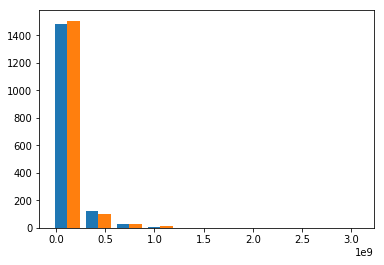

In [28]:
plt.hist([predicted, y_test])

# Underfitting and Overfitting (Adjusting Machine Learning Models)

<p>
    <strong>Subajuste:</strong>
    Se presenta cuando un modelo no puede capturar la tendencia de los datos. Es generalmente el resultado de un modelo extremadamente simple.
</p>
<p>
    <strong>Sobreajuste:</strong>
e presenta cuando un algoritmo está perfectamente adaptado a los datos con los que lo entrenamos, pero si trataran de predecir nuevos datos, lo más probable es que nos de error.
</p>
 <strong>Underfitting: Un dataset con:</strong>
<ul>
    <li>
        Pocos features (columns)
    </li>
     <li>
        muchos ejemplos (rows)
    </li>
</ul>
 <strong>Overfitting: Un dataset con:</strong>
<ul>
    <li>
        Pocos ejemplos (rows)
    </li>
     <li>
        Muchos features (columns)
    </li>
</ul>

# Evaluacion mas fina para el comportamiento del modelo

<p>
    Los estimadores y las funciones de sklear vienen con el maximo de argumentos con valores por defecto que
    suelen ser las mejores opciones si no tenemos algun conocimiento particular el problema. En esta caso
    particular la funcion <i>estimator.score</i> ya viene con una de las metricas de
    <i>sklearn.metrics</i>, que es la metrica <i>sklearn.metric.r2_score</i>
</p>

<p>
    El <strong>score R2</strong> de una regresion es una de las formas mas comunes de entender su poder
    predictivo.
    <i>Este mientras mas cerca de 1 este, mejor es</i>
</p>

<p>
  Los valores que puede tomar son de -infinito hasta 1. Un score R2 negativo es malom ya que esto indica que la
    regresion es peor que si simplemente eligieramos un valor fijo como prediccion para todos los puntos, la media
</p>

In [33]:
#El modelo no ha visto estos datos aun por lo que podemos ver su primer score
model.score(X_test, y_test)

0.8748574229721533

<p>
(UP)⇑ Como eligimos datos de test separados de los datos de entrenamiento, el Estimador aún no ha visto estos datos lo que equivale a predecir sobre datos nuevos. Un score sobre éstos datos nos daría una idea del resultado predicho sobre datos nuevos
</p>
<strong>siempre visualiza tus resutlados, aunque tengas un buen score de performance.</strong>

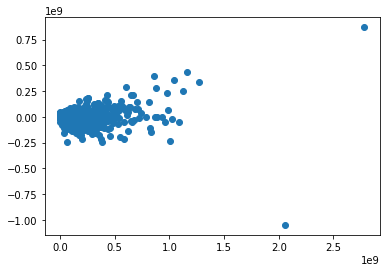

In [35]:
# residuals diferencias que hay entre la prediccion y el valor real.
residuals = y_test - predicted
plt.scatter(y_test, residuals)

In [36]:
# Errores absolutos
ap_residuals = np.abs(residuals) / y_test

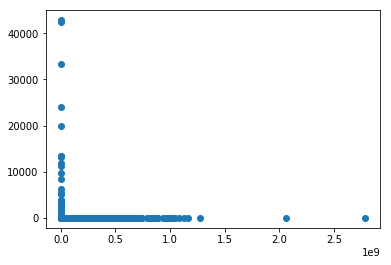

In [37]:
plt.scatter(y_test, ap_residuals)

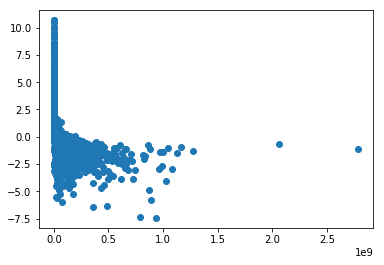

In [38]:
# como se sigue viendo mal la visualizacion se usara una vista logaritmica viendo los datos en longitud
# en vez de verlos en absoluto
lap_residuals = np.log(ap_residuals)
plt.scatter(y_test, lap_residuals)

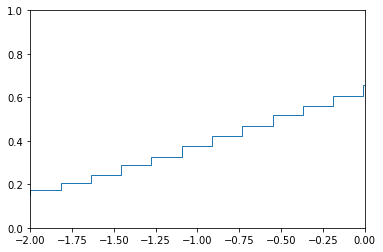

In [44]:
plt.hist(lap_residuals, bins=100, normed=1, histtype='step', cumulative=True);
plt.axis([-2, 0, 0, 1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5));